In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matrix
import model
import analysis as an
import plot

In [2]:
def analysis(init, patterns, end_time):
    """sparsity_analysis.
    Generate simulation data to analyze how K_ac
    sparsity affects model dynamics.

    :param init:  inital abudance vector
    :param pattern: matrix patterns to test
    :param end_time: time steps to simulate
    """
    rows, n = [], len(init)
    
    fixation_times = []
    for pattern in patterns:
        curr_mat = matrix.pattern_matrix(pattern, n)
        
        # simulate model with given params
        t, N, S, E, P = model.simulate(curr_mat, init, end_time)
        # N, S are variables by time points matrices
        
        
        # Calculate statistics
        row = {"pattern": pattern}
        
        row["initial_conditions"] = init
        
        # Compute time to fixation
        row['fixation_time'] = len(N[0])
        
        # Compute growth rate
        row["growth_rate"] = an.growth_rate(N.T)
        
        N = np.apply_along_axis(an.normalize, 1, N.T).T
        
        # Compute skewness 
        row["skewness"] = np.average(an.skewness(N.T))
        
        # Compute richness
        richnessVals = [an.richness(i) for i in N.T]
        row["richness"] = np.average(richnessVals)
        
        # Compute shannon index
        row["shannon_index"] = np.average(an.shannon_index(N.T))
        
        # Add Bray Curtis distance metric array for each K_ac simulation
        brayCurtisMtx = np.identity(n)
        for i in range(n):
            for j in range(i + 1, n):
                brayCurtisMtx[i, j] = an.bray_curtis(N[i], N[j])
        row["bray curtis"] = brayCurtisMtx
        
        # store for easy conversion to a dataframe
        rows.append(row)
        
    return pd.DataFrame(rows)

In [3]:
patterns = ['null', 'ident', 'naive', 'immune', 'barbell', 'cycle', 'complete', 'star']

In [4]:
# Create random inits
def make_random_init(num_strains):
    max_val = 0.5
    min_val = 0
    
    init = []
    for i in range(num_strains):
        init.append(np.random.uniform(min_val, max_val))
    
    return init

In [5]:
# Generate 100 random inits
inits = []
for i in range(100):
    inits.append(make_random_init(4))

In [6]:
# Create dataframe containing statistics for all inits
big_df = pd.DataFrame()

for init in inits:
    res = analysis(init, patterns, 50)
    big_df = big_df.append(res)

big_df.reset_index(drop=True)

,pattern,initial_conditions,fixation_time,growth_rate,skewness,richness,shannon_index,bray curtis
0,null,"[0.4750313314665518, 0.1071539922185894, 0.043...",129,-0.007442,-5.119466e-01,1.0,35.303861,"[[1.0, 0.6318904381157474, 0.8314390355416721,..."
1,ident,"[0.4750313314665518, 0.1071539922185894, 0.043...",93,-0.005873,-1.723286e-02,1.0,28.009592,"[[1.0, 0.4494860332828192, 0.5982893767154025,..."
2,naive,"[0.4750313314665518, 0.1071539922185894, 0.043...",80,-0.006693,-1.078653e+00,1.0,21.893867,"[[1.0, 0.6318904381157476, 0.8314390355416718,..."
3,immune,"[0.4750313314665518, 0.1071539922185894, 0.043...",198,-0.004686,-2.821498e-01,1.0,50.493853,"[[1.0, 0.47522692030407687, 0.5980428172876011..."
4,barbell,"[0.4750313314665518, 0.1071539922185894, 0.043...",218,-0.004001,1.734369e-01,1.0,48.007622,"[[1.0, 0.7974057130578834, 0.9128378930889489,..."
...,...,...,...,...,...,...,...,...
795,immune,"[0.12527573033666667, 0.3656848682433189, 0.27...",159,-0.005860,5.608879e-02,1.0,47.621542,"[[1.0, 0.48967094019762936, 0.3759838392733873..."
796,barbell,"[0.12527573033666667, 0.3656848682433189, 0.27...",75,-0.005948,-7.733807e-01,1.0,23.776593,"[[1.0, 0.4817877590457238, 0.3390671974507873,..."
797,cycle,"[0.12527573033666667, 0.3656848682433189, 0.27...",73,-0.006103,-5.107026e-15,1.0,22.721195,"[[1.0, 0.5172440843632072, 0.37598383927338785..."
798,complete,"[0.12527573033666667, 0.3656848682433189, 0.27...",66,-0.006702,-1.177774e+00,1.0,20.241718,"[[1.0, 0.531687148421814, 0.39702596405444857,..."


In [7]:
# Create pattern dataframes
null_df = big_df.loc[big_df['pattern'] == 'null']
ident_df = big_df.loc[big_df['pattern'] == 'ident']
naive_df = big_df.loc[big_df['pattern'] == 'naive']
immune_df = big_df.loc[big_df['pattern'] == 'immune']
barbell_df = big_df.loc[big_df['pattern'] == 'barbell']
cycle_df = big_df.loc[big_df['pattern'] == 'cycle']
complete_df = big_df.loc[big_df['pattern'] == 'complete']
star_df = big_df.loc[big_df['pattern'] == 'star']

# Create list to hold all pattern dataframes
all_pattern_dfs = [null_df, ident_df, naive_df, immune_df, barbell_df, cycle_df, complete_df, star_df]

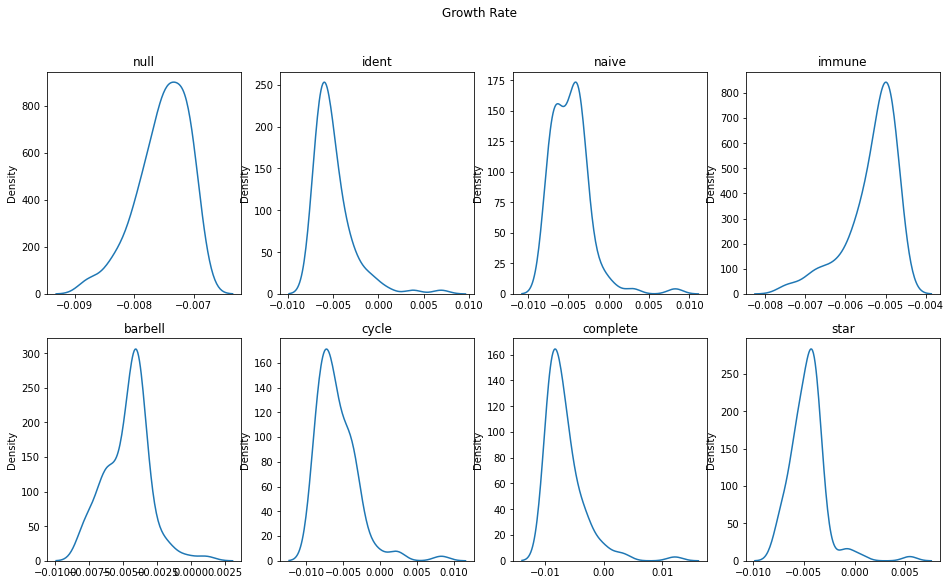

In [8]:
# growth rate plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['growth_rate'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Growth Rate')
plt.show()

/Users/deepikayeramosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


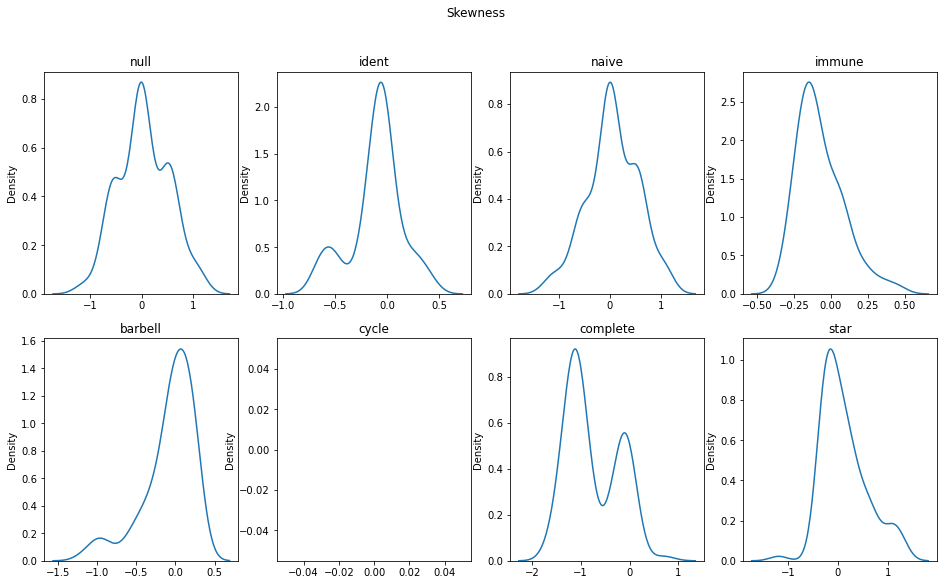

In [9]:
# skewness plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['skewness'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Skewness')
plt.show()

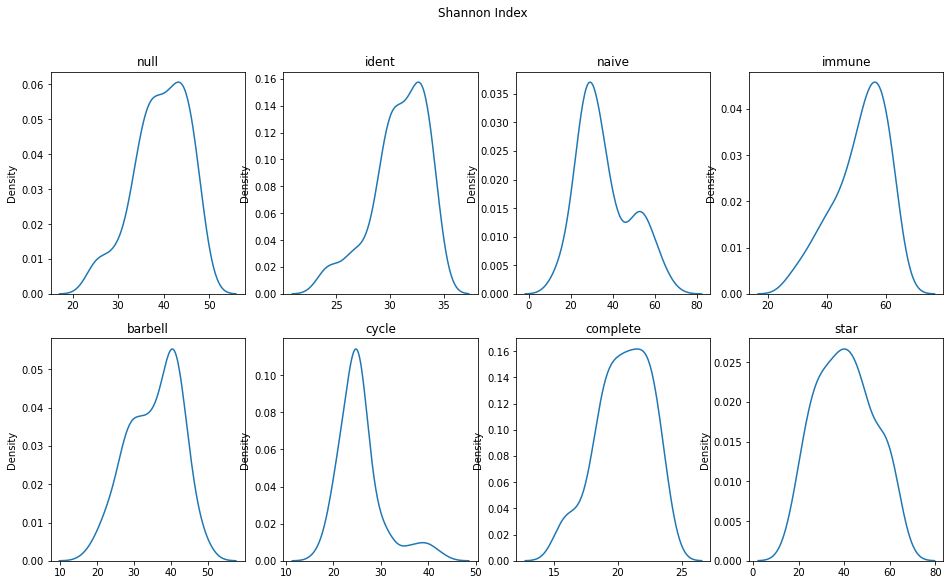

In [10]:
# shannon index plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['shannon_index'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Shannon Index')
plt.show()

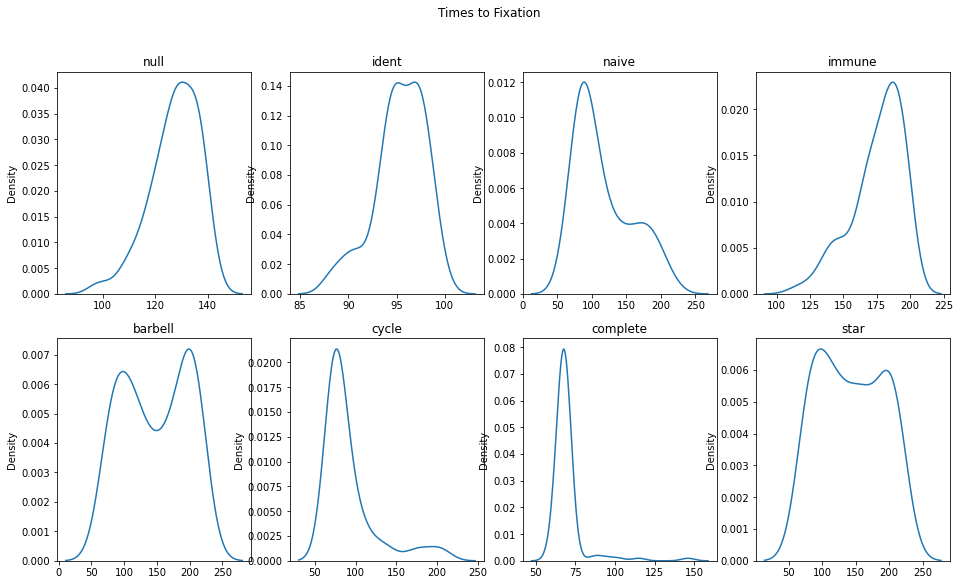

In [11]:
# fixation time plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['fixation_time'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Times to Fixation')
plt.show()

In [12]:
# Melt big_df
pd.melt(big_df, id_vars =['pattern'], value_vars =['growth_rate', 'skewness', 'shannon_index', 'fixation_time'])

,pattern,variable,value
0,null,growth_rate,-0.007442
1,ident,growth_rate,-0.005873
2,naive,growth_rate,-0.006693
3,immune,growth_rate,-0.004686
4,barbell,growth_rate,-0.004001
...,...,...,...
3195,immune,fixation_time,159.000000
3196,barbell,fixation_time,75.000000
3197,cycle,fixation_time,73.000000
3198,complete,fixation_time,66.000000
